1. nest gorup list tracks all groups, nest group map marks atomic events (index) to groups(key) (add this to obj.py)
2. executing an atomic event, add logic that searches it inside nest group map. if found, apply the group arrow to it aswel.
3. E I P only includes atomic events. however, the arrow dictionaries like .responses and such include groups, which are resulved in execute.

groups {'group1': {'E3', 'E4', 'E2'}}
groups_map {'E3': 'group1', 'E4': 'group1', 'E2': 'group1'}
conditions {'group1': {'E1'}}
excludes {'group1': {'E5'}}
enabled: {'E5', 'E1'}


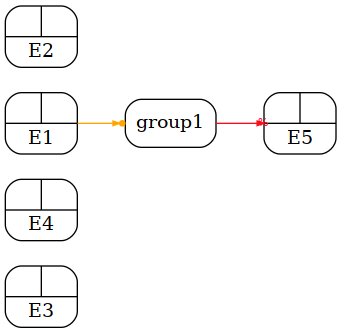

execute E3
groups {'group1': {'E3', 'E4', 'E2'}}
conditions {'group1': {'E1'}}
excludes {'group1': {'E5'}}


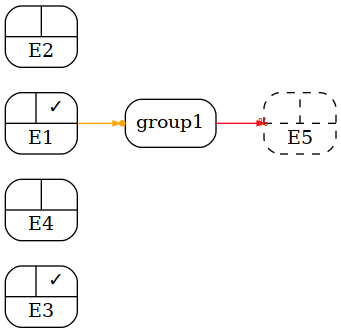

enabled: {'E3', 'E4', 'E2', 'E1'}


In [1]:
import pm4py

from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

from pm4py.objects.dcr.hierarchical.obj import HierarchicalDcrGraph
from pm4py.objects.dcr.hierarchical import semantics as Hiearchical_Semantics

graph = HierarchicalDcrGraph()
semantics = Hiearchical_Semantics.HiearchicalSemantics()
events = [
    "E1", "E2",  "E3",  "E4","E5"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.marking.included.add(event)
    graph.label_map[event] = event

graph.nestedgroups.update({"group1":{"E2","E3","E4"}})
graph.excludes.update({"group1":{"E5"}})
graph.conditions.update({"group1":{"E1"}})

graph.__init__(graph.obj_to_template())


print(f"groups {graph.nestedgroups}")
print(f"groups_map {graph.nestedgroups_map}")
print(f"conditions {graph.conditions}")
print(f"excludes {graph.excludes}")

print(f"enabled: {semantics.enabled(graph)}")
pm4py.view_dcr(graph)

semantics.execute(graph,"E1")
semantics.execute(graph,"E3")
print("execute E3")
print(f"groups {graph.nestedgroups}")
print(f"conditions {graph.conditions}")
print(f"excludes {graph.excludes}")
pm4py.view_dcr(graph)
print(f"enabled: {semantics.enabled(graph)}")